# Red neuronal de cero
### Basado en tutorial de DOT CSV
>[Link al video](https://www.youtube.com/watch?v=W8AeOXa_FqU)

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

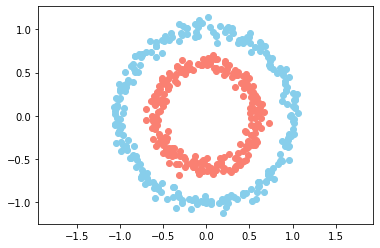

In [2]:
# CREAR EL DATASEt

n = 500      #número de población de datos
p = 2        #número de características/atributos de cada registro

X, Y = make_circles(n, shuffle=True, factor=0.6, noise=0.05)  # "make_circles?" para doc.

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], color="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], color="salmon")
plt.axis("equal")
plt.show()

In [3]:
# CLASE DE LA CAPA DE LA RED
# n_conn: número de conexiones/entradas a la capa
# n_neur: número de neuronas en la capa
# act_f: función de activación

class neural_layer():
    
    def __init__(self, n_conn, n_neur, act_f):
        
        #función de activación 
        self.act_f = act_f                                
        
        #se asigna random los bias, el (*2 - 1) es para normalizar y que queden valores entre -1 y 1
        self.B = np.random.rand(1, n_neur) * 2 - 1

        #se asignan random a los pesos w, el (*2 -1) idem a bias
        self.W = np.random.rand(n_conn, n_neur) * 2 - 1     

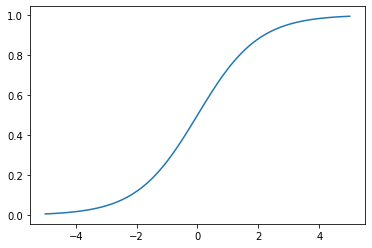

In [4]:
# FUNCIONES DE ACTIVACIÓN

sigmoide = (lambda x: 1 / (1 + np.e ** (-x)),   # función sigmoide
            lambda x: x * (1 - x))              # derivada de la misma

relu = lambda x: np.maximum(0, x)               # función relu

r = np.linspace(-5, 5, 100)             #100 valores entre -5 y 5
plt.plot(r, sigmoide[0](r))                    #pruebas 



In [5]:
# función que creará la red neuronal
#
# topology: vector de longitud n donde n es el número de capa y cada elemento será el número de neuronas en la capa i. 
# Con i = 0, 1, ...., n
#
# act_f: función de activación en todas las capas

def create_nn(topology, act_f):
    
    nn = []
    
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l], topology[l+1], act_f))
        
    return nn


In [6]:
topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigmoide)

#función de coste error cuadrático medio
func_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),           #función de error
            lambda Yp, Yr: (Yp - Yr))                          #derivada de la misma


# función de entrenamiento de una red
# nn: red neuronal ; X: valores de entrada; Y:valores de salida; func_cost: funcion de coste; lr: learning rate
# train: si es True entrena, si es False hace una predicción.
def train(nn, X, Y, func_cost, lr=0.5, train=True):
    
    out = [(None, X)]
    
    # Forward pass
    for i, layer in enumerate(nn):
        
        z = out[-1][1] @ nn[i].W + nn[i].B     
        a = nn[i].act_f[0](z)
        out.append((z, a))
        
    if train:
        
        #Back pass
        deltas = []
        
        for i in reversed(range(0, len(nn))):
        
            z = out[i+1][0]
            a = out[i+1][1]
            
            if(i == len(nn) -1):
                #calcular delta última capa
                deltas.insert(0, func_cost[1](a, Y) * nn[1].act_f[1](a))
            else:
                #calcular delta respecto a capa previa
                deltas.insert(0, deltas[0] @ _W.T * nn[1].act_f[1](a))
            
            _W = nn[i].W
            #Gradient descent
        
            nn[i].B = nn[i].B - np.mean(deltas[0], axis=0, keepdims=True) * lr
            nn[i].W = nn[i].W - out[i][1].T @ deltas[0] * lr

    return out[-1][1]
    
    
train(neural_net, X, Y, func_cost, 0.5)
print("")

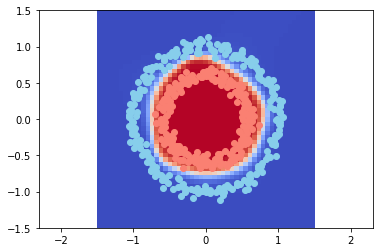

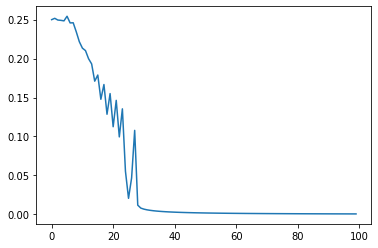

In [7]:
# VISUALIZACIÓN Y TEST

import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigmoide)

loss = []

for i in range(2500):
    
  # Entrenemos a la red!
  pY = train(neural_n, X, Y, func_cost, lr=0.05)
  
  if i % 25 == 0:
    
    print(pY)
  
    loss.append(func_cost[0](pY, Y))
  
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, func_cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)  